In [10]:
import cv2 as cv
import PIL as pl
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def readImage(path):   #through OpenCV
   img = cv.imread(path)
   return img

def loadImage(path):
   img= pl.read(path)
   return img

def grayScale(img):
    img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    return img

In [16]:
def viewImage(img,title):
    cv.imshow(title,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [18]:
I = readImage("./Images/image1.jpg")
viewImage(I,"Image1")

In [21]:
gI = grayScale(I)

In [25]:
viewImage(gI,"grayScale")

In [19]:
I.shape

(225, 300, 3)

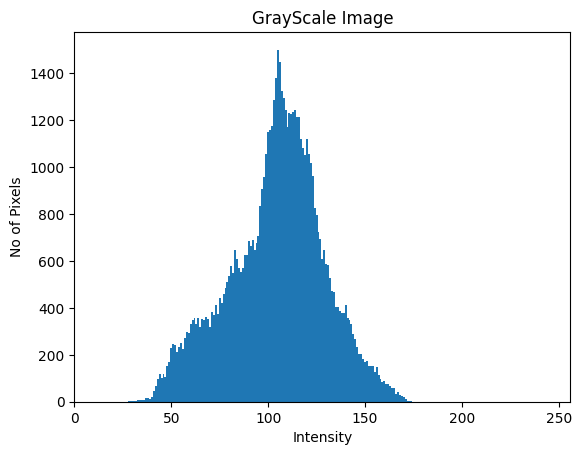

<Figure size 640x480 with 0 Axes>

In [34]:
hist = cv.calcHist([gI], [0], None, [256], [0, 256])
plt.figure()
plt.bar(np.arange(0,256),hist.flatten(),width=1)
plt.title("GrayScale Image")
plt.ylabel("No of Pixels")
plt.xlabel("Intensity")
plt.xlim([0,256])
plt.show()
plt.tight_layout()
                  

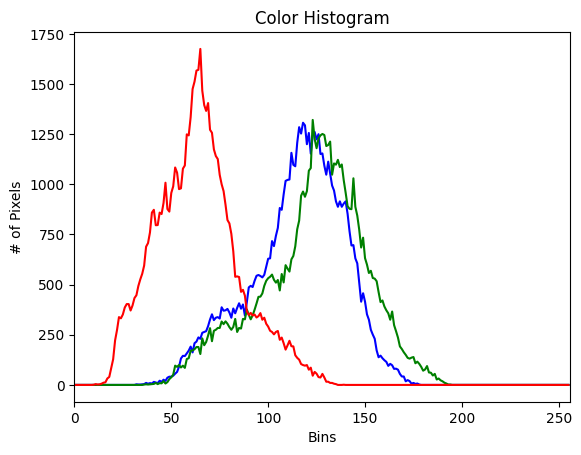

In [35]:
channels = cv.split(I)
colors = ("b", "g", "r")
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Calculate and plot the histogram for each color channel
for (channel, color) in zip(channels, colors):
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.show()

In [ ]:
equalized_red = cv.equalizeHist(channels[2])
equalized_green = cv.equalizeHist(channels[1])
equalized_blue = cv.equalizeHist(channels[0])

# Merge channels back into a color image
enhanced_image = cv.merge((equalized_blue, equalized_green, equalized_red))
viewImage(enhanced_image,"Enhanced Image")